Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples

=> Difference between anomaly and outlier
 Algorithms used for anomaly detection (Isolation Forest, DBSCAN, Autoencoders, LSTM)
 Real-world case studies

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

=> 1. Isolation Forest (IF)
Approach:

A tree-based anomaly detection algorithm.

Randomly splits data into branches.

Anomalies are isolated faster because they lie far from dense regions.

The number of splits required to isolate a point = anomaly score.

2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Approach:

A density-based clustering algorithm.

Groups points into clusters based on density.

Points in low-density regions = anomalies (noise points).

3. Local Outlier Factor (LOF)
Approach:

Density-based anomaly detection.

Compares the local density of a point with the density of its neighbors.

If a point’s density is much lower → local outlier.

Question 3: What are the key components of a Time Series? Explain each with one
example.


=> A time series is data collected over time at regular intervals (daily, hourly, monthly, etc.).
Every time series usually has four main components:

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

=> Constant mean

Constant variance

Constant autocovariance (no changing trends or seasonality)

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.


=> Examples with Python code
 When to choose ARIMA vs SARIMA vs SARIMAX
 Parameter selection (p, d, q, P, D, Q) using ACF/PACF plots


Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

/tmp/ipython-input-2077103288.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range(start="2010-01-01", periods=periods, freq="M")


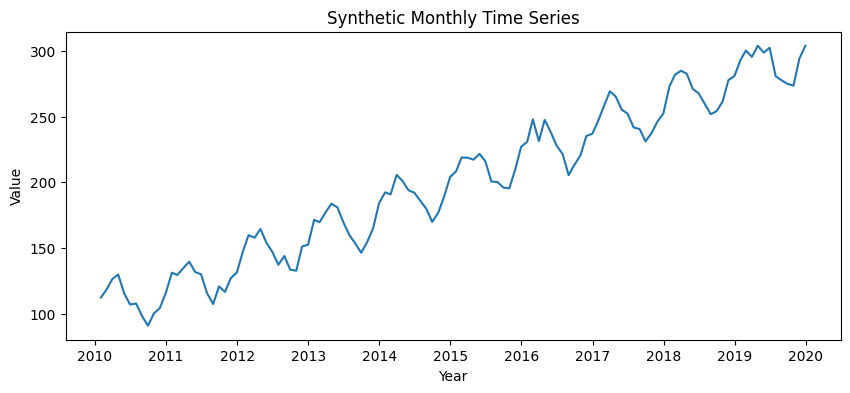

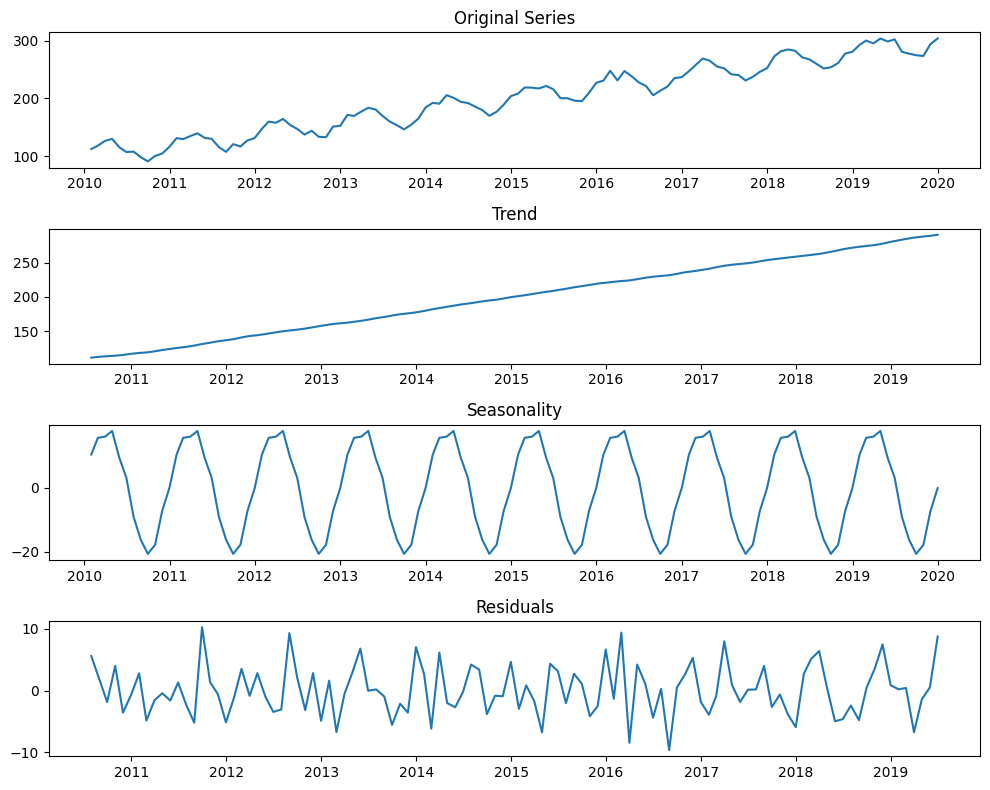

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

np.random.seed(42)
periods = 120
time_index = pd.date_range(start="2010-01-01", periods=periods, freq="M")

trend = np.linspace(100, 300, periods)
seasonal = 20 * np.sin(2 * np.pi * time_index.month / 12)
noise = np.random.normal(0, 5, periods)

ts = trend + seasonal + noise
ts = pd.Series(ts, index=time_index)

plt.figure(figsize=(10,4))
plt.plot(ts)
plt.title("Synthetic Monthly Time Series")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

decomp = seasonal_decompose(ts, model="additive", period=12)

plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(ts)
plt.title("Original Series")

plt.subplot(4,1,2)
plt.plot(decomp.trend)
plt.title("Trend")

plt.subplot(4,1,3)
plt.plot(decomp.seasonal)
plt.title("Seasonality")

plt.subplot(4,1,4)
plt.plot(decomp.resid)
plt.title("Residuals")

plt.tight_layout()
plt.show()


Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.


/tmp/ipython-input-1949401375.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')


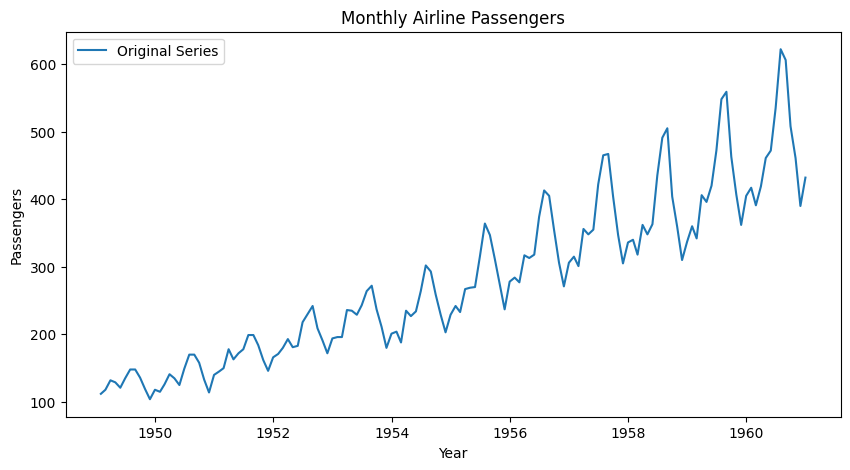

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


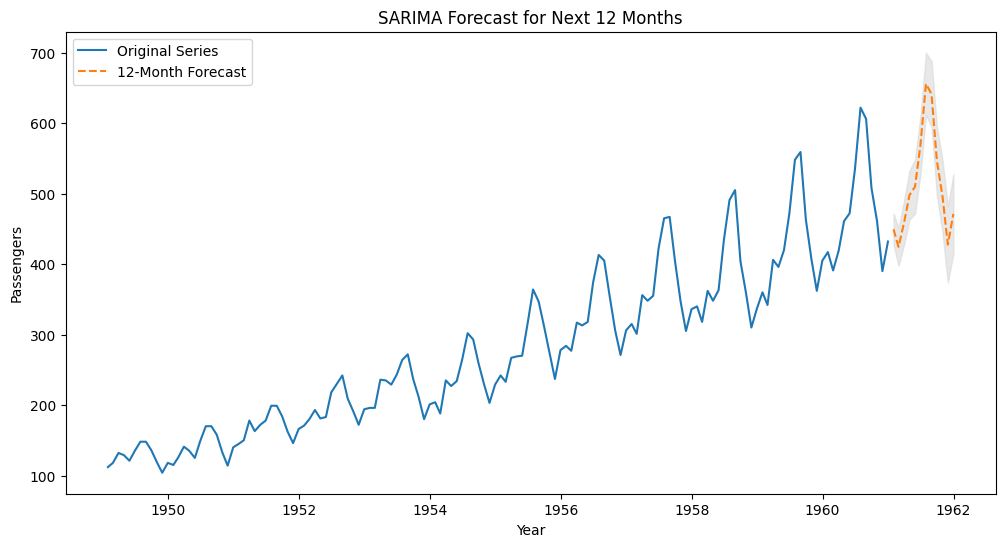

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

data = sm.datasets.get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)

ts = data['value']

plt.figure(figsize=(10,5))
plt.plot(ts, label='Original Series')
plt.title('Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

model = SARIMAX(ts,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
results = model.fit()

forecast = results.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(ts, label='Original Series')
plt.plot(forecast_values, label='12-Month Forecast', linestyle='--')

plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='lightgray', alpha=0.5)

plt.title('SARIMA Forecast for Next 12 Months')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()


Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.


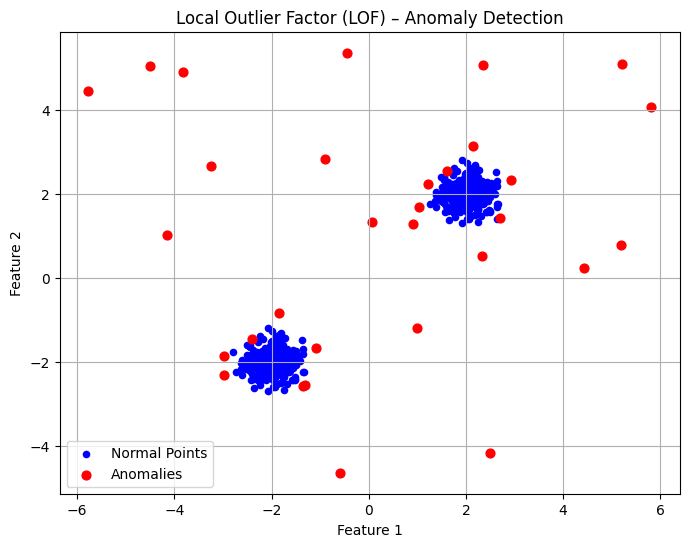

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = 0.3 * np.random.randn(300, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))

X = np.r_[X_inliers, X_outliers]

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)

normal = X[labels == 1]
anomalies = X[labels == -1]

plt.figure(figsize=(8, 6))
plt.scatter(normal[:, 0], normal[:, 1], c='blue', s=20, label='Normal Points')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=40, label='Anomalies')

plt.title("Local Outlier Factor (LOF) – Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
